# Gram-Schmidt Process

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Manual implementation of Gram-Schmidt Process

Q^T Q by computed Q
[[ 1. -0. -0. -0.]
 [-0.  1.  0. -0.]
 [-0.  0.  1.  0.]
 [-0. -0.  0.  1.]]


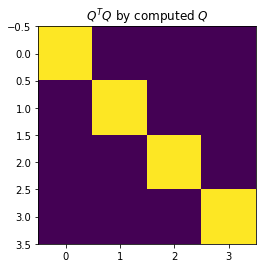

Computed Q
[[ 0.152 -0.63   0.739  0.184]
 [-0.8    0.073  0.079  0.59 ]
 [-0.2    0.591  0.652 -0.431]
 [ 0.545  0.499  0.149  0.657]]

Q from QR decomposition function
[[-0.152 -0.63  -0.739  0.184]
 [ 0.8    0.073 -0.079  0.59 ]
 [ 0.2    0.591 -0.652 -0.431]
 [-0.545  0.499 -0.149  0.657]]

It could have sign flips


In [10]:
m = 4
n = 4

# Given matrix
A = np.random.randn(m, n)

# Orthogonalized matrix by Gram-Schmidt Process
Q = np.zeros((m, n))

# Loop over columns
for i in range(n):

    Q[:, i] = A[:, i]
    
    # Current reference vector
    a = A[:, i]
    
    # Orthogonalize the ith column in Q relative to previous columns in A
    for j in range(i):
        
        # Get previous orthogonalized column
        q = Q[:, j]
        
        # Subtract the projection of current vector onto previous orthogonalized vector from current vector
        Q[:, i] = Q[:, i] - (np.dot(a, q) / np.dot(q, q)) * q
        
    # Normalize the ith column
    Q[:, i] = Q[:, i] / np.linalg.norm(Q[:, i])

# If Q is orthogonalized, Q^T Q should give identity matrix
print('Q^T Q by computed Q')
print(np.round(Q.T @ Q, 3))
plt.imshow(Q.T @ Q)
plt.title('$Q^T Q$ by computed $Q$')
plt.show()

# Compare our computed Q with Q from QR decomposition function
Q2, R = np.linalg.qr(A, 'complete')
print('Computed Q')
print(np.round(Q, 3))
print()

print('Q from QR decomposition function')
print(np.round(Q2, 3))
print()

print('It could have sign flips')